In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
from tqdm import tqdm_notebook as tqdm

In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import utils

In [3]:
data = pd.read_hdf("../data/train_part_1_v2.hdf")

In [4]:
S1 = []
S2 = []
S3 = []
S4 = []

Ss = [S1, S2, S3, S4]

for row in tqdm(data.itertuples(), total=data.shape[0]):
    mask = np.array(row.FOI_hits_S)
    X = np.array(row.FOI_hits_X)
    Y = np.array(row.FOI_hits_Y)
    Z = np.array(row.FOI_hits_Z)
    
    for i in range(4):
        Ss[i].extend(list(zip(X[mask==i], Y[mask==i], Z[mask==i])))

In [5]:
del data

In [7]:
# station_sizeX = utils.stationRegionsXsize * 100
# station_sizeY = utils.stationRegionsYsize * 100
# station_size = utils.stationSizes
# station_paddingX = station_size['X'] - station_sizeX.sum(axis=0)
# station_paddingY = station_size['Y'] - station_sizeY.sum(axis=0)
# station_size

# def plot_station(ax):
#     i = 0
#     M2_X_regions = [300, 600, 1200, 2402] 
#     M2_Y_regions = [250, 500, 1001, 2002] 
#     paddingX = 300
#     paddingY = 250

#     station_size = utils.stationSizes
#     width = station_size.iloc[i]['X']
#     height = station_size.iloc[i]['Y']
#     print(width)
#     outer_bound = ptch.Rectangle((-width/2,-height/2), width,
#                                  height, fill=False, linewidth=4)
# #     ax.add_patch(station_patch(i))
#     ax.set_xlim(-width/2 - 300, 300 + width/2)
#     ax.set_ylim(-height/2 - 300, 300 + height/2)
    
#     x_offset = paddingX
#     y_offset = paddingY
#     padding_width = paddingX
#     padding_height = paddingY
    
#     padding = ptch.Rectangle((-padding_width/2,-padding_height/2), padding_width,
#                                  padding_height, fill=True, color = "red", alpha = 0.1, linewidth=1)
#     for i in range(4):
#         r_width = M2_X_regions[i] + sum(M2_X_regions[:i])
#         r_height = M2_Y_regions[i] + sum(M2_Y_regions[:i])
#         p = ptch.Rectangle((-r_width, -r_height), r_width*2,
#                                  r_height*2, fill=True, alpha = 0.2, linewidth=1)
#         ax.add_patch(p)
        
#     ax.add_patch(padding)

#     return ax

# fig, ax = plt.subplots()
# coordinates = data[['Lextra_X[0]', "Lextra_Y[0]"]]
# _ = ax.hist2d(coordinates.iloc[:,0], coordinates.iloc[:,1], bins=500, alpha = 0.8, cmap = "viridis_r")
# plot_station(ax)
# fig.set_size_inches(20, 20)



In [8]:
Ss = [np.array(x) for x in Ss]

In [9]:
for i in range(4):
    count_all = len(Ss[i]) 
    count_unique = len(np.unique(Ss[i], axis=0))
    print(f"M{i+1} recieved {count_all} hits with {count_unique} unique hits. Unique ratio = {100*(count_unique/count_all):.3f}%")

M1 recieved 6370365 hits with 41020 unique hits. Unique ratio = 0.644%
M2 recieved 5574359 hits with 39897 unique hits. Unique ratio = 0.716%
M3 recieved 4128748 hits with 10395 unique hits. Unique ratio = 0.252%
M4 recieved 4354354 hits with 10562 unique hits. Unique ratio = 0.243%


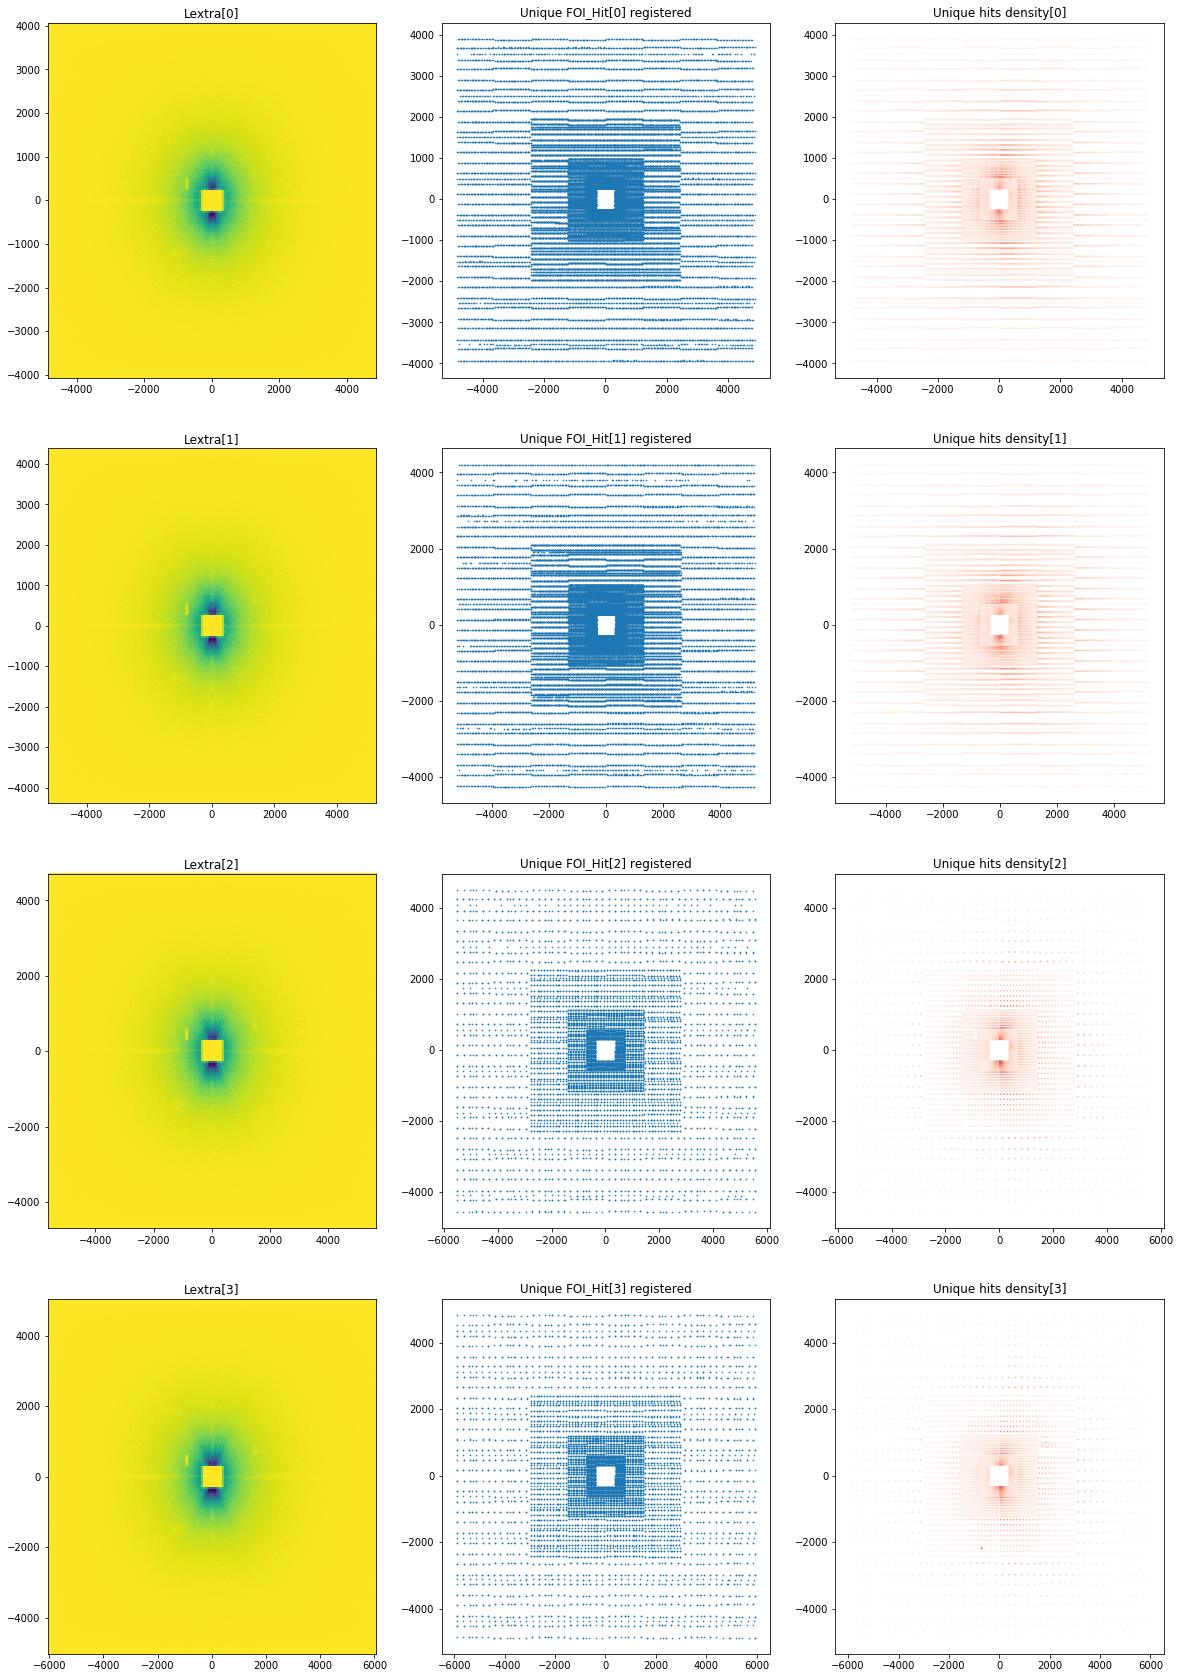

In [49]:
fig, axes = plt.subplots(4, 3)
for i in range(4):
    coordinates = data[[f'Lextra_X[{i}]', f"Lextra_Y[{i}]"]]
    _ = axes[i][0].hist2d(coordinates.iloc[:,0], coordinates.iloc[:,1], bins=200, cmap = "viridis_r")
    unique_hits, counts = np.unique(Ss[i], axis=0, return_counts=True)
    counts = counts / np.max(counts)
    _ = axes[i][1].scatter(unique_hits[:, 0], unique_hits[:, 1], s= 0.4)
    _ = axes[i][2].scatter(unique_hits[:, 0], unique_hits[:, 1], s = 0.6, alpha = 0.5, c = counts, cmap = "Reds")

    axes[i][0].set_title(f"Lextra[{i}]")
    axes[i][1].set_title(f"Unique FOI_Hit[{i}] registered")
    axes[i][2].set_title(f"Unique hits density[{i}]")

fig.set_size_inches(20, 30)

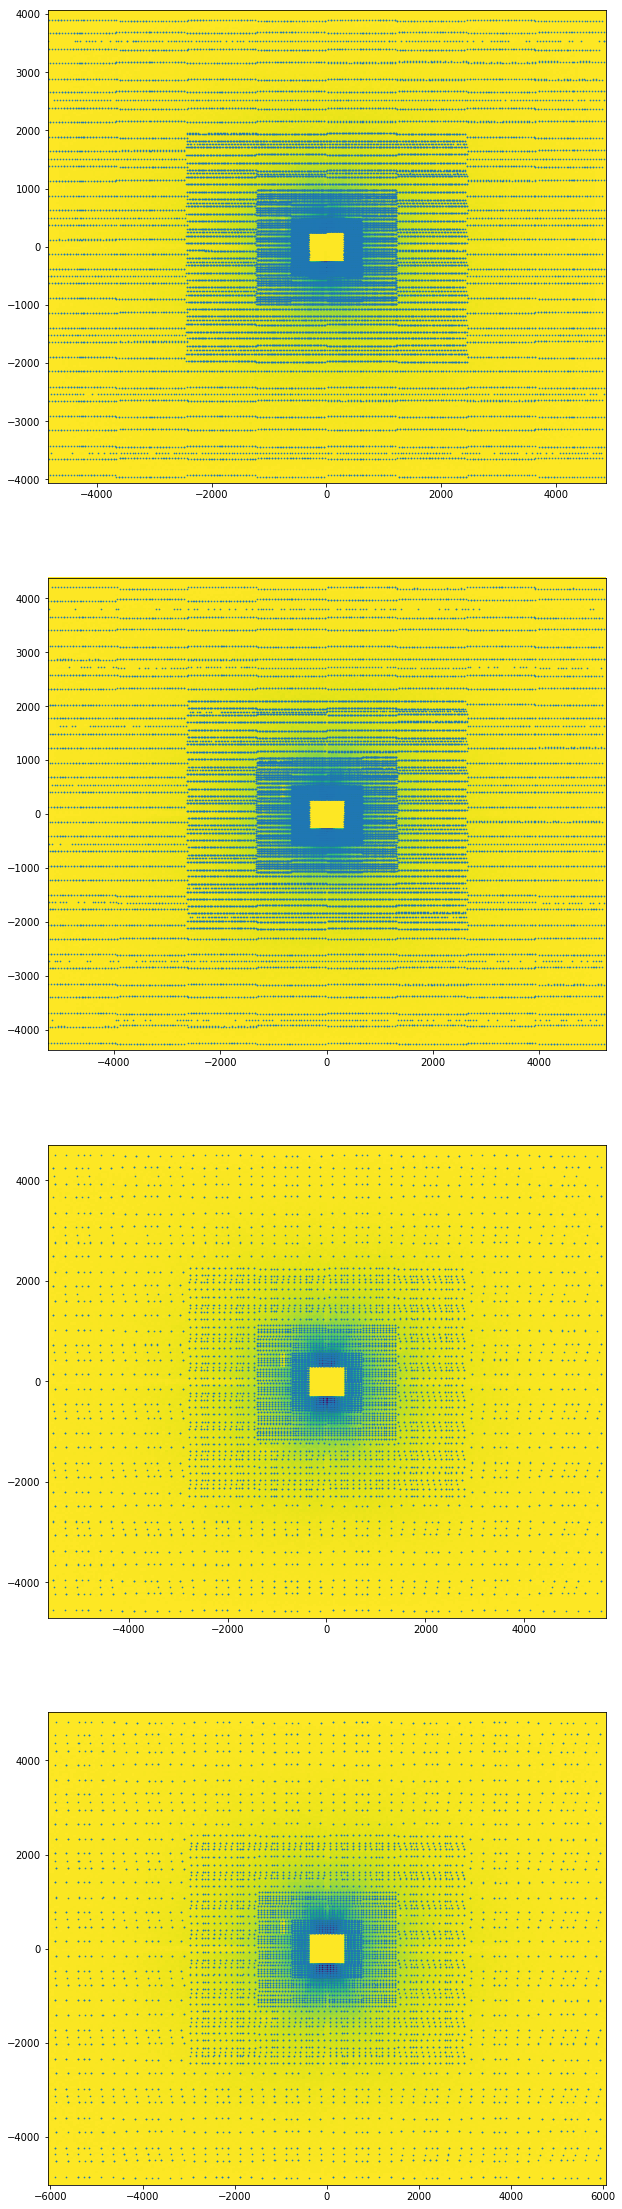

In [53]:
fig, axes = plt.subplots(4)
for i in range(4):
    coordinates = data[[f'Lextra_X[{i}]', f"Lextra_Y[{i}]"]]
    _ = axes[i].hist2d(coordinates.iloc[:,0], coordinates.iloc[:,1], bins=200, cmap = "viridis_r")
    unique_hits, counts = np.unique(Ss[i], axis=0, return_counts=True)
    counts = counts / np.max(counts)
    _ = axes[i].scatter(unique_hits[:, 0], unique_hits[:, 1], s= 0.4)

fig.set_size_inches(10, 40)

# 3D Visualization

In [66]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

3.3.0


In [ ]:
all_hits, hits_counts = np.unique(np.concatenate(Ss, axis=0), axis=0, return_counts=True)

In [72]:
all_hits, hits_counts = np.unique(Ss[0], axis=0, return_counts=True)

In [74]:
import plotly.graph_objs as go
plot3d =go.Scatter3d(
    x=all_hits[:, 0],
    y=all_hits[:, 1],
    z=all_hits[:, 2],
    mode="markers", 
    
    marker=dict(
        size=5,
        color=hits_counts,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        line=dict(
            color='rgba(255, 255, 255, 0.6)',
            width=1
        ),
        opacity=1
    )
)
plot([plot3d])


'file:///Users/ygavrilin/Projects/IDAO/muon-detection/notebooks/temp-plot.html'

In [16]:
# Pad size prediction

In [62]:
distance_to_closest_pad = []
same_x = []
for i in tqdm(all_hits):
    ah_same_x = all_hits[np.logical_and(all_hits[:, 0]==i[0], all_hits[:, 2]==i[2])]
#     ah_same_y = all_hits[all_hits[:, 1]==i[1] && all_hits[:, 2]==i[2]]
    same_x.append(len(ah_same_x))
#     break
#     distances = np.sum((all_hits - i)**2, axis= 1)
#     all_hits_different = all_hits[distances > 0]
#     closest_pad = all_hits_different[distances[distances > 0].argmin()]
#     distance_to_closest_pad.append(np.abs(i - closest_pad))

KeyboardInterrupt: 

In [45]:
len(distance_to_closest_pad)

101874

In [47]:
len(np.unique(distance_to_closest_pad))

895

In [17]:
min_dists, min_dists_count = np.unique(distance_to_closest_pad, return_counts=True)

In [23]:
min_dists_count.sort()

In [26]:
min_dists_count

IndexError: too many indices for array

In [ ]:
# from sklearn.tree import DecisionTreeRegressor, export_graphviz
# dtr = DecisionTreeRegressor(max_leaf_nodes = 32)
# dtr.fit(all_hits, np.array(distance_to_closest_pad)*1000)

In [102]:
# dtr.score(all_hits, np.array(distance_to_closest_pad)*1000)

0.4488935498098547

In [15]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(dtr, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())


In [36]:
all_hits.shape

(101874, 3)

'file:///Users/ygavrilin/Projects/IDAO/muon-detection/notebooks/temp-plot.html'